In [123]:
import pandas as pd 
import numpy as np
import scipy 
import scipy.stats
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import curve_fit

df = pd.read_csv(".\datasets\owid-covid-data.csv") 
df = df[df.location == "Ukraine"]
df.head()


ModuleNotFoundError: No module named 'sc'

In [117]:
df1 = df[[ "new_cases", "new_deaths"]]
df1 = df1.fillna(0)
df1.head()


,new_cases,new_deaths
206927,1.0,0.0
206928,0.0,0.0
206929,0.0,0.0
206930,0.0,0.0
206931,0.0,0.0


In [118]:
dfc, dfd = df1["new_cases"], df1["new_deaths"]
dfc, dfd = dfc.to_numpy(), dfd.to_numpy()
# dfc = np.array([31.0, 35.5, 40.9, 43.1, 46.8, 49.1, 51.5, 60.8, 63.5, 79.0, 87.5, 105.1])
# dfd = np.array([4.2, 4.6, 5.4, 5.8, 6.2, 6.6, 7.0, 8.0, 8.4, 10.6, 11.6, 14.0])
#print(dfc,  dfd)
one =  np.ones(len(dfc))
#print(one)
X = []
for i in range(len(one)):
    X.append([one[i], dfc[i]])
X = np.array(X)
A =  np.matmul(X.transpose(), X)
A = inv(A) 
A = np.matmul(A, X.transpose())
A = np.matmul(A, dfd)
print("Y={}+{}*X+u".format(A[0], A[1]))

Y=38.541630676375064+0.01467095234047671*X+u


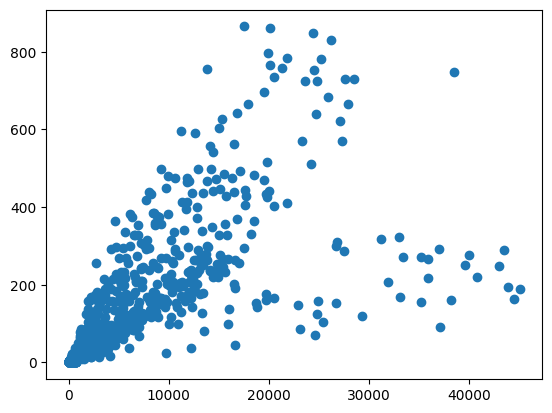

In [119]:
plt.plot(dfc, dfd, "o")
plt.show()



In [120]:
def linearFunction(n, k):
    Y = []
    for i in range(len(n)):
        Y.append(k[0] + k[1]*n[i]) 
    Y = np.array(Y)
    return Y

Y1 = linearFunction(dfc, A)
print(Y1)

[ 38.55630163  38.54163068  38.54163068  38.54163068  38.54163068
  38.54163068  38.54163068  38.54163068  38.54163068  38.54163068
  38.57097258  38.54163068  38.54163068  38.60031449  38.64432734
  38.54163068  38.57097258  38.73235306  38.80570782  38.92307544
  38.54163068  38.89373353  39.24583639  39.28984925  40.21411924
  39.21649448  40.287474    39.6126102   39.96471305  40.72760258
  40.05273877  41.10904734  40.78628638  39.75931972  38.70301115
  40.63957686  41.56384686  41.827924    43.10429685  43.060284
  42.444104    43.30969019  42.50278781  44.29264399  44.36599876
  45.8917778   45.05553352  43.57376733  42.37074924  44.6300759
  45.39296542  47.02144113  45.53967494  45.5543459   45.75973923
  44.29264399  44.42468256  45.23158494  46.46394494  45.21691399
  46.61065446  45.90644875  44.67408875  43.91119923  45.68638447
  45.97980351  45.93579066  46.09717113  46.1998678   44.64474685
  44.0432378   44.43935352  44.73277256  45.62770066  46.28789351
  44.89415304

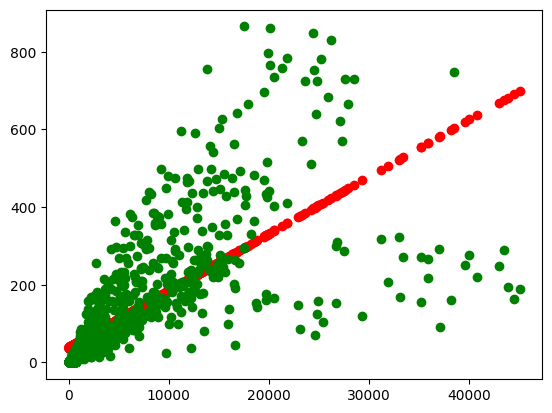

In [121]:
plt.plot(dfc, Y1, "o", color = "red")

plt.plot(dfc, dfd, "o", color = "green")
plt.show()


In [127]:
corr_matrix = np.corrcoef(dfd, Y1)
corr = corr_matrix[0,1]
rsq = corr**2
print(rsq)

m = len(dfc)
n = 1 
fr = (rsq/(1-rsq))*((n-m-1)/m)
print(fr)

0.5006201087666708
-1.0024835151657363
